# Overview
This post aims to simplify **Bar chart** by matpltlib as much as possible based on the philosophy of minimalist 

![image](https://user-images.githubusercontent.com/8764683/56109936-7bec3c00-5f07-11e9-9916-88c4628c727f.png)


# Prerequisite

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Bar plot
The key points are as follows:
> 1. Clarify the key message
2. Use comparison to show the size difference of data
3. Think of what is the most effective way to convey the message

## Default

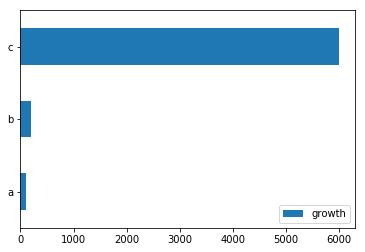

In [4]:
## Default
df_bar = pd.DataFrame([100, 200, 6000], 
                  index=['a', 'b', 'c'],
                  columns=['growth'])
df_bar.plot(kind='barh');

## Simplified Bar chart
* Delete legend
* Tighten the space between bars
* Re-order the y-axis
* Delete the square spines
* Delete ticks for x and y axis 
* Delete tick label for x axis
* Increase the size of the label for y axis
* Display each value next to the bar 

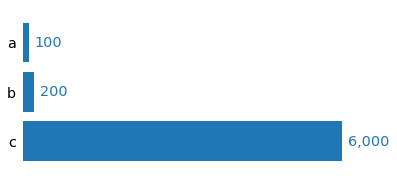

In [5]:
# 1. Delete legend legend=False
# 2. Tighten the space between bars width=0.8
width = 0.8
fig, ax = plt.subplots(figsize=(6, 3))
df_bar.plot(kind='barh', legend=False, ax=ax, width=width);
# 3. Re-order the y-axis
ax.invert_yaxis()

# 4. Delete the square spines
[spine.set_visible(False) for spine in ax.spines.values()]

# 5. Delete ticks for x and y axis
# 6. Delete tick label for x axis
ax.tick_params(bottom=False, left=False, labelbottom=False)

# 7. Increase the size of the label for y axis
ax.tick_params(axis='y', labelsize='x-large')

# 8. Display each value next to the bar
vmax = df_bar['growth'].max()

for i, value in enumerate(df_bar['growth']):
    ax.text(value+vmax*0.02, i, f'{value:,}', fontsize='x-large', va='center', color='C0')


In [38]:
## As a Function 
def minimal_bar(series, ax=None, width=0.8, fisize=(6, 3), 
               reorder_yaxis=True, splines_off=True, delete_ticks=True, y_label_large=True, display_value=True):

    if ax is None:
        fig, ax = plt.subplots(figsize=fisize)

    # 1. Delete legend legend=False
    # 2. Tighten the space between bars width=0.8
    series.plot(kind='barh', legend=False, ax=ax, width=width, color='C0');
    
    # 3. Re-order the y-axis
    if reorder_yaxis:
        ax.invert_yaxis()

    # 4. Delete the square spines
    if splines_off:
        [spine.set_visible(False) for spine in ax.spines.values()]

    # 5. Delete ticks for x and y axis
    # 6. Delete tick label for x axis
    if delete_ticks:
        ax.tick_params(bottom=False, left=False, labelbottom=False)

    # 7. Increase the size of the label for y axis
    if y_label_large:
        ax.tick_params(axis='y', labelsize='x-large')

    # 8. Display each value next to the bar
    if display_value:
        vmax = series.max()
        for i, value in enumerate(series):
            ax.text(value+vmax*0.02, i, f'{value:,}', fontsize='x-large', va='center', color='C0')




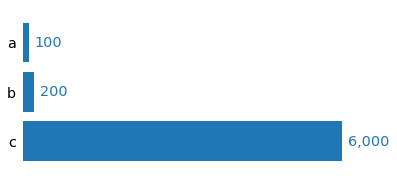

In [39]:
minimal_bar(series=df_bar['growth'])